**Hotel Booking Cancellation Prediction System**

Group 25

 Abeyrathne H.G.D.C.N - EG/2019/3520

 Sadeepa P.M.A.S - EG/2019/3726

##Importing libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [2]:
# Downloading Dataset from Github
!wget -O hotel_bookings.csv 'https://raw.githubusercontent.com/ssadeepa/Hotel_Booking_Cancellation_Prediction/main/hotel_bookings.csv'

--2024-04-19 11:10:30--  https://raw.githubusercontent.com/ssadeepa/Hotel_Booking_Cancellation_Prediction/main/hotel_bookings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotel_bookings.csv’

hotel_bookings.csv  100%[===================>]  16.07M  --.-KB/s    in 0.1s    

2024-04-19 11:10:30 (120 MB/s) - ‘hotel_bookings.csv’ saved [16855599/16855599]



In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('hotel_bookings.csv')

# Display the first few rows of the DataFrame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


##Dataset Description



---



| **Feature** | **Description** |
| --------- | ------------ |
| **1. Hotel Type** | Types of hotels: Resort Hotel, City Hotel. |
| **2. Cancellation Status** | Reservation cancellation status (0 = not canceled, 1 = canceled). |
| **3. Lead Time** | Number of days between booking and arrival. |
| **4. Arrival Date Year** | Year of arrival. |
| **5. Arrival Date Month** | Month of arrival. |
| **6. Arrival Date Week Number** | Week number of the year for arrival. |
| **7. Arrival Date Day of Month** | Day of the month of arrival. |
| **8. Weekend Nights Stays** | Number of weekend nights (Saturday and Sunday) the guest stayed or booked. |
| **9. Week Nights Stays** | Number of week nights the guest stayed or booked. |
| **10. Adults** | Number of adults. |
| **11. Children** | Number of children. |
| **12. Babies** | Number of babies. |
| **13. Meal Type** | Type of meal booked (BB = Bed & Breakfast, FB = Full Board, HB = Half Board, SC = Self Catering, Undefined). |
| **14. Country of Origin** | Country of origin of the guest. |
| **15. Market Segment** | Market segment designation. |
| **16. Distribution Channel** | Booking distribution channel. |
| **17. Repeated Guest** | If the guest is a repeat customer (0 = not repeated, 1 = repeated). |
| **18. Previous Cancellations** | Number of previous bookings that were canceled by the customer. |
| **19. Previous Bookings Not Canceled** | Number of previous bookings that were not canceled by the customer. |
| **20. Reserved Room Type** | Type of reserved room. |
| **21. Assigned Room Type** | Type of assigned room. |
| **22. Booking Changes** | Number of changes made to the booking. |
| **23. Deposit Type** | Type of deposit made (No Deposit, Refundable, Non-Refund). |
| **24. Travel Agent ID** | ID of the travel agent responsible for the booking. |
| **25. Company ID** | ID of the company responsible for the booking. |
| **26. Days in Waiting List** | Number of days the booking was in the waiting list. |
| **27. Customer Type** | Type of customer (Transient, Contract, Transient-Party, Group). |
| **28. Average Daily Rate (ADR)** | Average Daily Rate. |
| **29. Car Parking Spaces** | Number of car parking spaces required. |
| **30. Special Requests** | Number of special requests made by the guest. |
| **31. Reservation Status** | Last reservation status (Check-Out, Canceled, No-Show). |
| **32. Reservation Status Date** | Date of the last reservation status. |


##Dataset Overview



---



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 32)

Categorical Features:

    'hotel',
    'arrival_date_month',
    'meal', 'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
    'reservation_status_date'

Numerical Features:


    'is_canceled',
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'agent',
    'company',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'

In [6]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


**Identifying Noisy Data Features**

Based statical summary, the following features seem to contain noisy data:

**adr**:  The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, ADR has a minimum value of -6.38. A negative rate doesn't make sense, indicating potential error.

**adults**: The minimum value is 0, which implies bookings without any adults. This could be a data entry error.

**children and babies**: Both have a maximum value of 10, which seems unusually high for a single booking. This could be a potential outlier or data entry error.

We have address these noisy data in the later part of the code.

In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


**country**: 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.

##Exploratory Data Analysis (EDA)



---



###From where the most guests are coming ?

In [8]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [9]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

### _

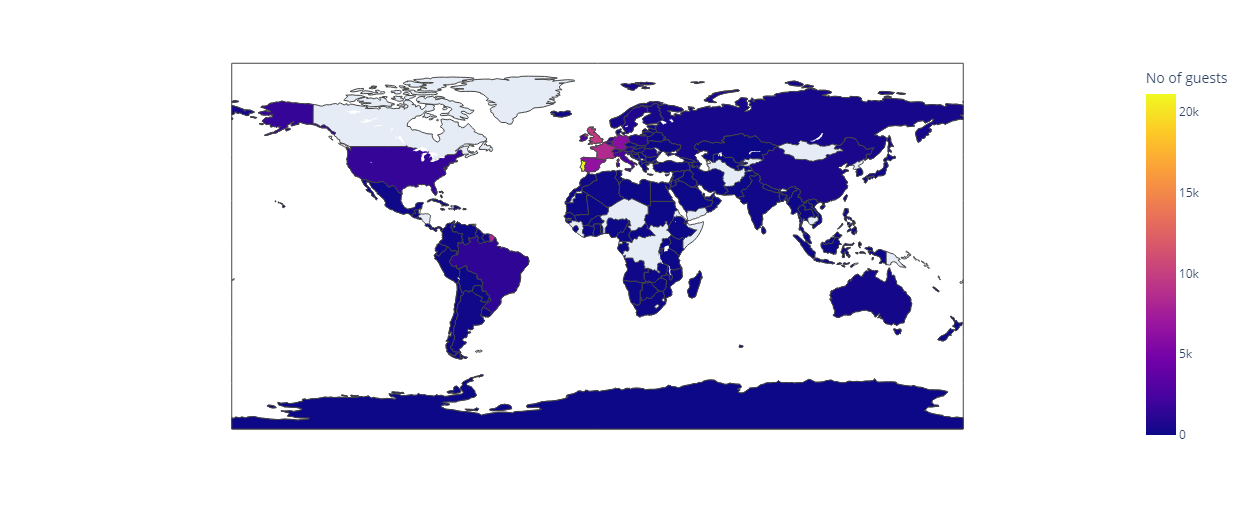

###How does the price vary per night over the year?

In [10]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456




*   Max price for resort hotel - August
*   Min price for resort hotel - November

*   Max price for city hotel - May
*   Min price for city hotel - January


In [11]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

In [12]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final_prices = sort_month(final_hotel, 'month')
final_prices

plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

This plot clearly shows that prices in the Resort Hotel are much higher during the summer.

###Which are the most busy months?

In [13]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']

final_guests = sort_month(final_guests,'month')

px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

### .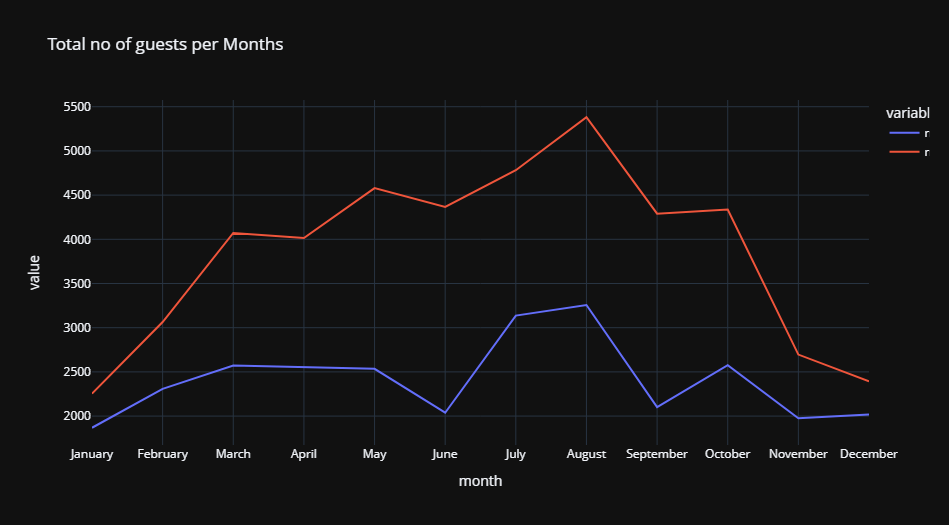

###How long do people stay at the hotels?

In [14]:
filter = df['is_canceled'] == 0
data = df[filter]

data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})

import plotly.express as px

px.bar(data_frame=stay,
       x='total_nights',
       y='Number of stays',
       color='hotel',
       barmode='group',
       template='plotly_dark',
       range_x=[0, 25])

### .

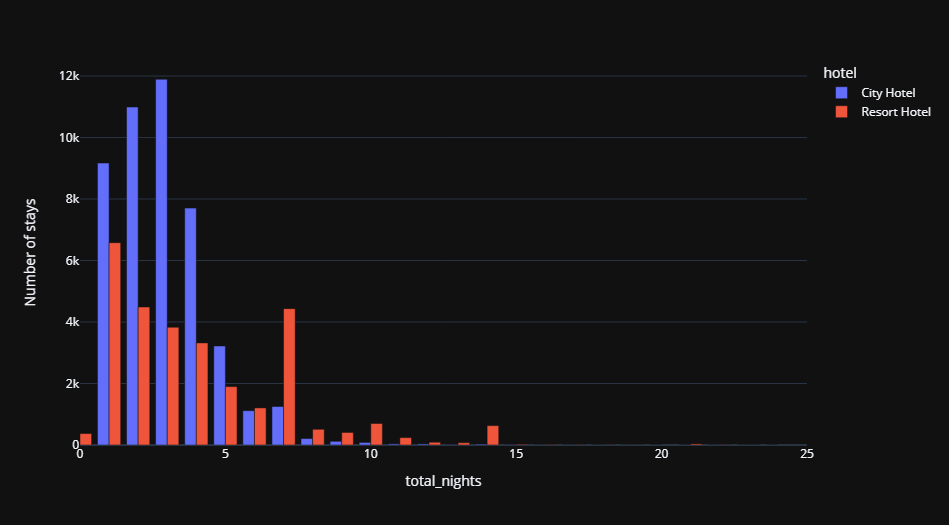

### Which month have the highest number of cancelations?

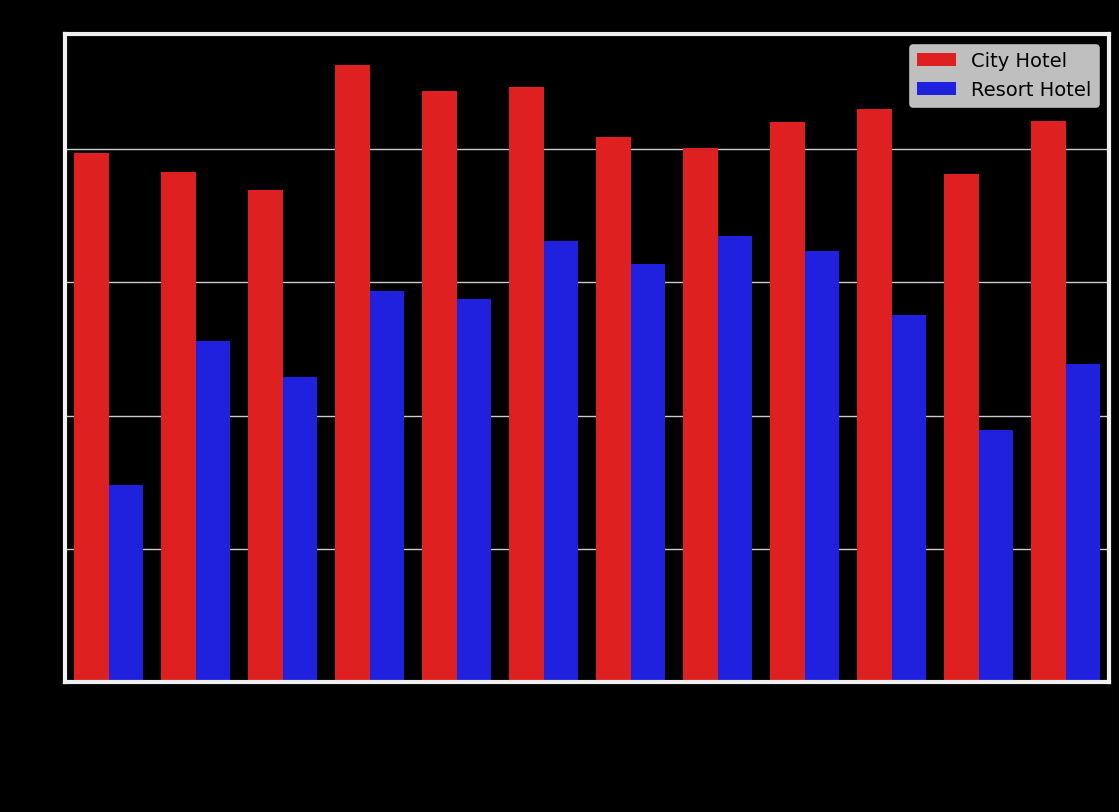

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and contains all the necessary columns

# Create a DataFrame with the relevant data:
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# Order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# Show figure:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Month", y="cancel_percent", hue="Hotel",
                 hue_order=["City Hotel", "Resort Hotel"], data=full_cancel_data,
                 palette=["red", "blue"])  # Using bright, contrasting colors
ax.set_title("Cancelations per month", fontsize=16)
ax.set_xlabel("Month", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Cancelations [%]", fontsize=16)
ax.legend(loc="upper right")

# Change the background color
ax.set_facecolor('black')  # Sets the axes background color
plt.gca().set_facecolor('black')  # Sets the current axes instance background color
plt.gcf().set_facecolor('black')  # Sets the entire figure background color

plt.show()


##Data Pre Processing



---



####Dropping Irrelevant Features



*   ***Dropping High-Cardinality Features***
*   ***Dropping features with high percentage of missing values***





There are a number of categorical features which, due to the large number of categories (high cardinality), probably do not have specific information for the model and should be considered as irrelevant features and should be deleted.

[ `country` ]: We have removed this feature for ease of work due to the large number of categories. Most of the guests came from several countries, so there is a bias if we include this feature.

[ `company` ]:
This feature removed due to high percentage of missing values


In [16]:
# Drop 'country' and 'company' colums
df = df.drop(['country', 'company'], axis=1)

In [17]:
df.shape

(119390, 30)

####Dropping Similar Features

[ `arrival_date_year` ] feature is similar to the reserved_room_type. So if we include it, it will be a redundant feature

In [18]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [19]:
# Drop the `arrival_date_year` feature
df = df.drop(['arrival_date_year'], axis=1)

####Features remove to generalize the model

The [ `arrival_date_year` ] feature only includes a few years, and if we want to build a model that generalizes well to future data, it is better not to include features that could bias the model towards specific years.

In [20]:
df = df.drop(['assigned_room_type'], axis=1)

####Check for null values and replace them with '0' zero.


[ `agent` ] (ID of the travel agent responsible for the booking): keep this and fill null values with 0 and normalize

In [21]:
# checking for null values
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000
children,4,0.003350


In [22]:
# filling null values with zero

df.fillna(0, inplace = True)

####Removing rows that adults, babies and children zero at same time

In [23]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,October,41,6,0,3,0,0.0,0,SC,Corporate,Corporate,0,0,0,A,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,October,42,12,0,0,0,0.0,0,SC,Corporate,Corporate,0,0,0,A,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,November,47,20,1,2,0,0.0,0,SC,Groups,TA/TO,0,0,0,A,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,December,53,30,1,4,0,0.0,0,SC,Groups,TA/TO,0,0,0,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,December,53,30,2,4,0,0.0,0,SC,Groups,TA/TO,0,0,0,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,June,26,27,0,3,0,0.0,0,BB,Online TA,TA/TO,0,0,0,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,June,26,30,0,1,0,0.0,0,SC,Complementary,Direct,0,0,0,E,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,July,28,15,1,1,0,0.0,0,SC,Online TA,TA/TO,0,0,0,A,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,July,28,15,2,5,0,0.0,0,SC,Online TA,TA/TO,0,0,0,A,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [24]:
df = df[~filter]
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


####Removing Directly Related Features



* [ `reservation_status` ] is a categorical feature that indicates the current status of a reservation. It contain categories 'Canceled', 'Check-Out', and 'No-Show'. This feature is directly related to the target variable is_canceled.
*   If the [ `reservation_status` ] is 'Canceled', it implies that is_canceled should be 1.
Similarly, if the reservation_status is 'Check-Out', it implies that the booking was not canceled, and hence is_canceled should be 0.

*   Therefore, knowing the [ `reservation_status` ] directly gives us the value of the target variable, leading to data leakage if it is used as a feature in the model. Therefore, reservation_status is considered as an irrelevant feature and should be omitted.
*   For the same reason [ `reservation_status_date` ] is also removed.


In [25]:
# Drop the `reservation_status`, 'reservation_status_date' feature
df = df.drop(['reservation_status','reservation_status_date'], axis=1)

In [26]:
df.shape

(119210, 26)

####Correlation

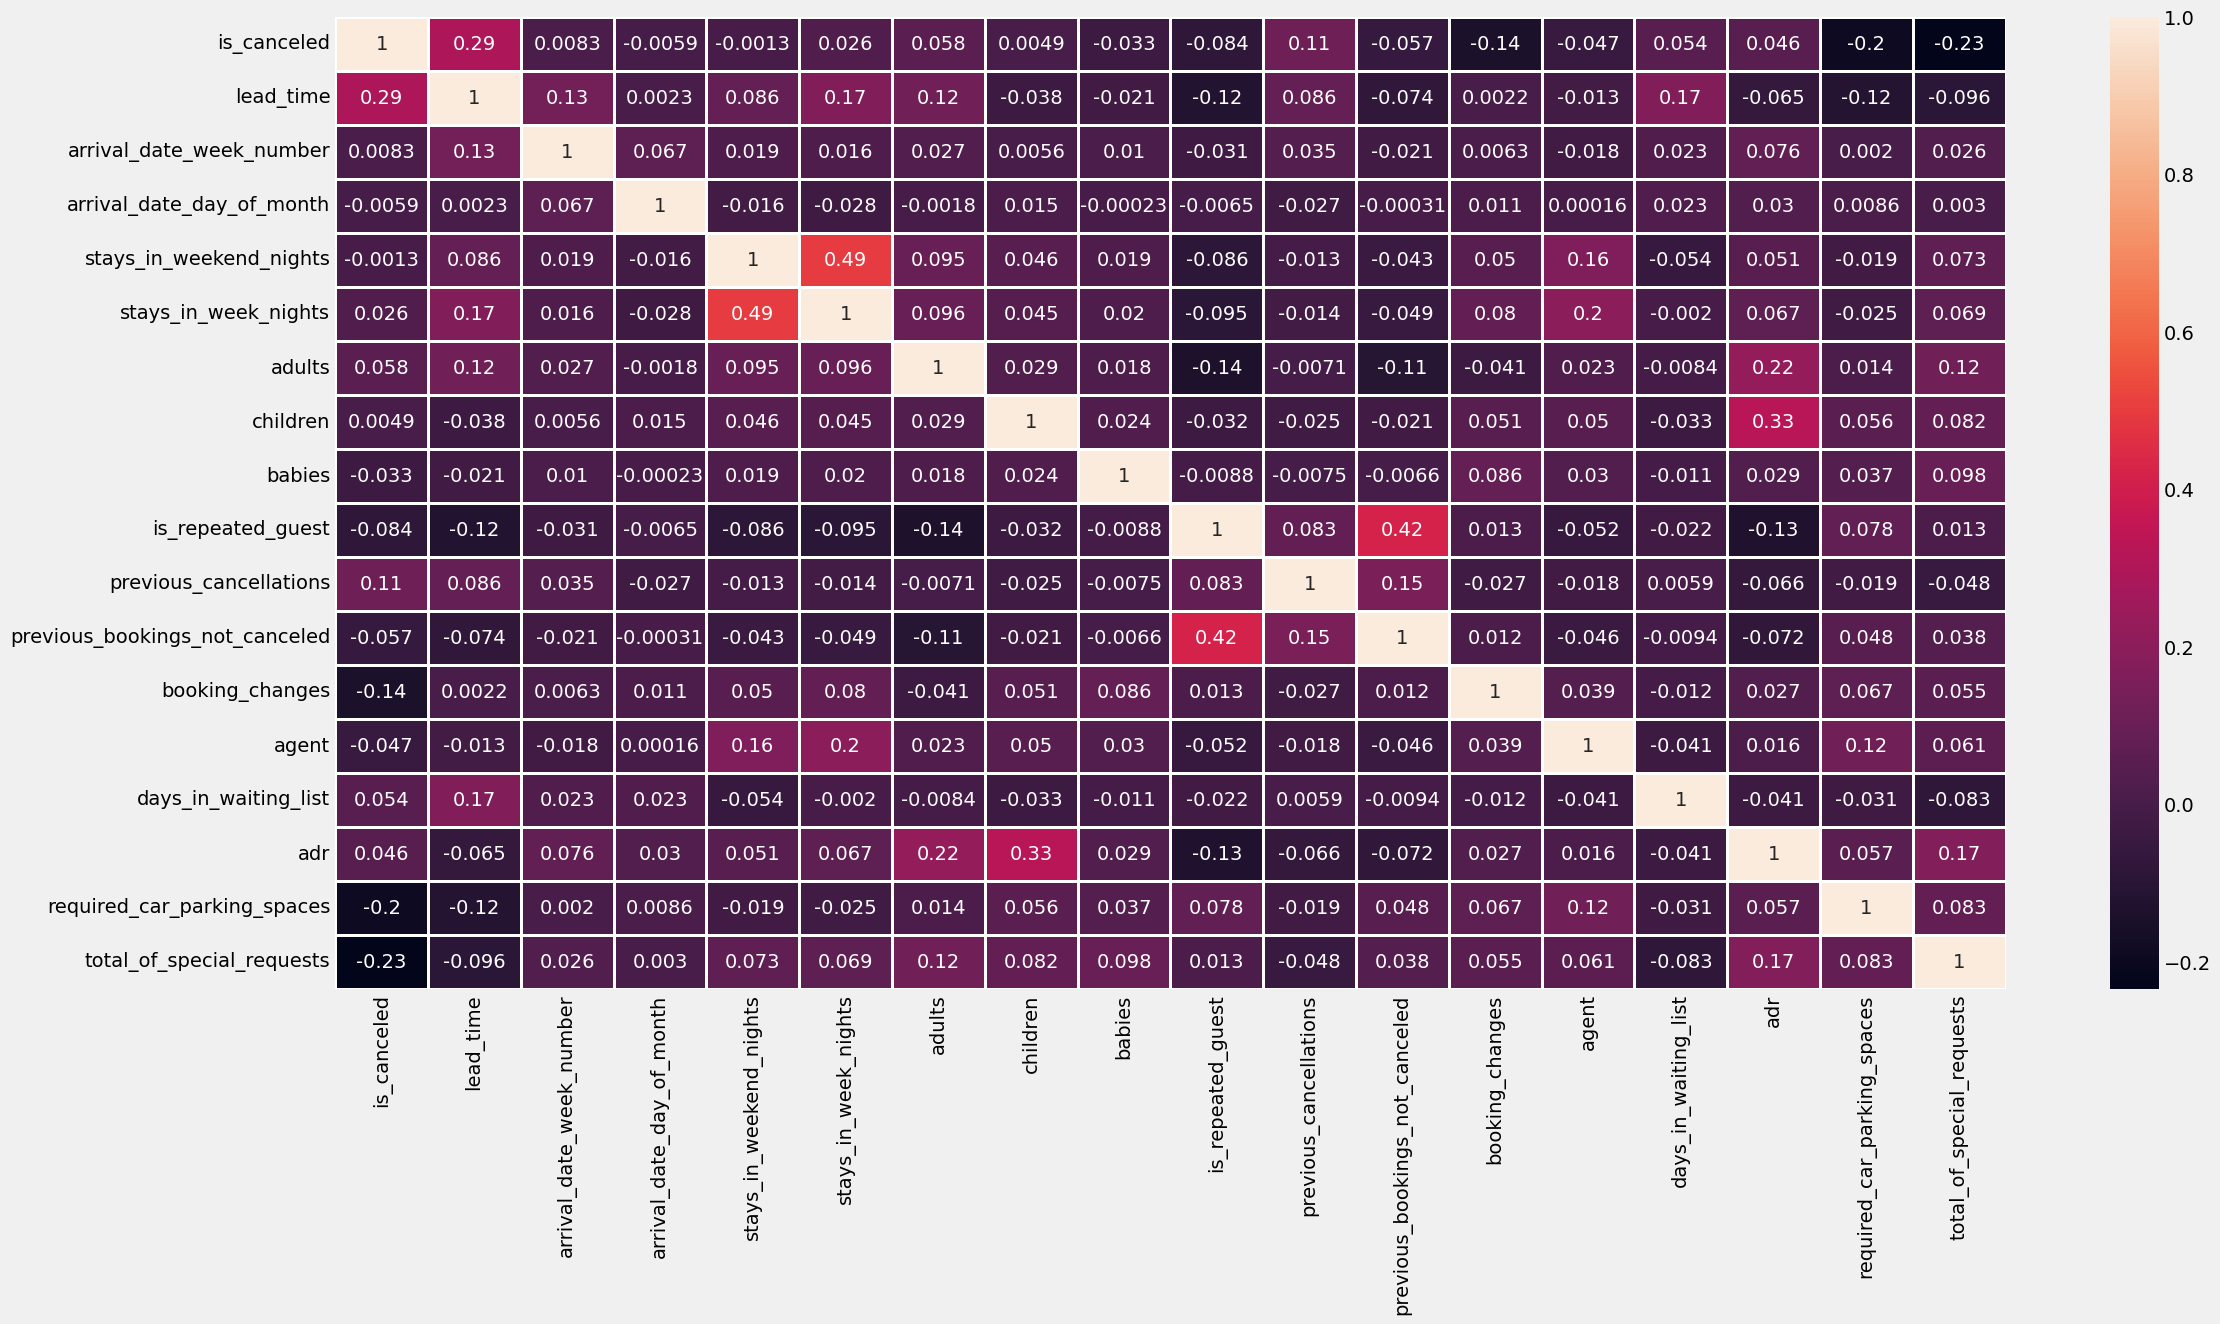

In [27]:
# Select columns with data type int64 or float64
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a new DataFrame with only the numeric columns
numeric_df = df[numeric_cols]

plt.figure(figsize = (24, 12))

corr = numeric_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [28]:
correlation = numeric_df.corr()['is_canceled'].sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
previous_cancellations            0.110139
adults                            0.058182
days_in_waiting_list              0.054301
adr                               0.046492
stays_in_week_nights              0.025542
arrival_date_week_number          0.008315
children                          0.004851
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
babies                           -0.032569
agent                            -0.046770
previous_bookings_not_canceled   -0.057365
is_repeated_guest                -0.083745
booking_changes                  -0.144832
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [29]:
# dropping columns that are not useful
# days_in_waiting_list : This feature has a low correlation with the target variable
# booking_changes :  Changes to bookings are relatively rare or don't significantly impact the outcome

useless_col = ['days_in_waiting_list', 'booking_changes']

df.drop(useless_col, axis = 1, inplace = True)

In [30]:
df.shape

(119210, 24)

##Handling Noisy Data



---





*   Some features have outliers. In this section some ouliers are removed


In [31]:
print("adr value counts:")
print(df['adr'].value_counts())
print("\nadults value counts:")
print(df['adults'].value_counts())
print("\nchildren value counts:")
print(df['children'].value_counts())
print("\nbabies value counts:")
print(df['babies'].value_counts())

adr value counts:
adr
62.00     3754
75.00     2715
90.00     2472
65.00     2418
80.00     1889
          ... 
108.86       1
38.57        1
64.21        1
88.53        1
157.71       1
Name: count, Length: 8866, dtype: int64

adults value counts:
adults
2     89680
1     23027
3      6202
0       223
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

children value counts:
children
0.0     110620
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

babies value counts:
babies
0     118293
1        900
2         15
10         1
9          1
Name: count, dtype: int64


In [32]:
# Analyze noisy data
noisy_data = {
    'adr':      df[df['adr'] < 0],
    'adults':   df[df['adults'] == 0],
    'children': df[df['children'] > 6],
    'babies':   df[df['babies'] > 6],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 223, 'children': 1, 'babies': 2}

In [33]:
# Replace negative adr with median of adr column
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

# Remove rows with 0 adults
df = df[df['adults'] != 0]

# Remove rows with 10 children or 10 babies
df = df[df['children'] != 10]
df = df[df['babies'] < 8]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': df[df['adr'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

In [34]:
df.shape

(118984, 24)

In [35]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,0.0,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,0.0,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,0.0,Transient,75.0,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,304.0,Transient,75.0,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,Transient,98.0,0,1


##Handling Categorical Features

In [36]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

###Label Encording

In [37]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

###One Hot Encording

In [38]:
# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118984 entries, 0 to 118983
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118984 non-null  int64  
 1   lead_time                       118984 non-null  int64  
 2   arrival_date_month              118984 non-null  int64  
 3   arrival_date_week_number        118984 non-null  int64  
 4   arrival_date_day_of_month       118984 non-null  int64  
 5   stays_in_weekend_nights         118984 non-null  int64  
 6   stays_in_week_nights            118984 non-null  int64  
 7   adults                          118984 non-null  int64  
 8   children                        118984 non-null  float64
 9   babies                          118984 non-null  int64  
 10  is_repeated_guest               118984 non-null  int64  
 11  previous_cancellations          118984 non-null  int64  
 12  previous_booking

##Split Dataset

In [40]:
# Define the features (X) and the output labels (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [41]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [42]:
X_train.shape

(95187, 45)

In [43]:
X_test.shape

(23797, 45)

In [44]:
X_train

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
36393,228,5,19,13,2,5,2,0.0,0,0,0,0,96.0,43.20,0,0,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
104729,0,1,4,28,0,1,2,0.0,0,0,0,0,0.0,88.00,0,0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
12031,6,6,23,10,0,1,1,0.0,0,0,0,0,240.0,132.00,0,1,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
19088,0,12,49,5,2,1,2,0.0,0,0,0,0,240.0,56.00,1,0,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
97371,315,9,38,17,1,1,2,0.0,0,0,0,0,1.0,65.00,0,1,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38157,130,7,28,9,2,0,2,0.0,0,0,0,0,242.0,140.00,0,1,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5463,87,4,18,29,2,5,2,0.0,0,0,0,0,71.0,46.00,0,0,...,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
74499,359,10,42,11,2,0,2,0.0,0,0,1,0,1.0,60.00,0,0,...,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
103492,23,12,53,30,0,2,2,0.0,0,0,0,0,9.0,148.00,0,2,...,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False


##Decision Tree Classifier

Default parameters for `DecisionTreeClassifier()`

When no parameters are specified for `DecisionTreeClassifier` in scikit-learn, it uses the default parameters as follows:

- `criterion`: `"gini"`, which is a measure of the quality of a split.
- `splitter`: `"best"`, meaning the best split is chosen at each node.
- `max_depth`: `None`, meaning the tree will expand until all leaves are pure or contain less than `min_samples_split` samples.
- `min_samples_split`: `2`, the minimum number of samples required to split an internal node.
- `min_samples_leaf`: `1`, the minimum number of samples required to be at a leaf node.
- `min_weight_fraction_leaf`: `0.0`, the minimum weighted fraction of the sum total of weights required to be at a leaf node.
- `max_features`: `None`, meaning all features are considered when looking for the best split.
- `random_state`: `None`, meaning the randomness of the algorithm is based on the random number generator.
- `max_leaf_nodes`: `None`, no limit on the number of leaf nodes.
- `min_impurity_decrease`: `0.0`, a node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- `class_weight`: `None`, all classes have the same weight.
- `presort`: `'deprecated'`, this parameter is ignored as of version 0.24.
- `ccp_alpha`: `0.0`, complexity parameter used for Minimal Cost-Complexity Pruning.


Accuracy Score of Decision Tree is : 0.8267428667479094




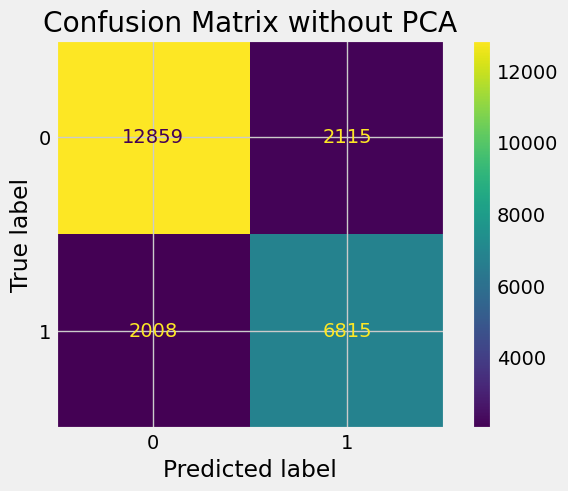

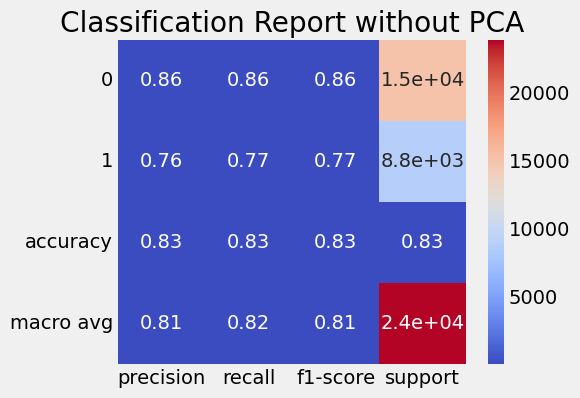

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Making predictions
y_pred_dtc = dtc.predict(X_test)

# Evaluating the model
# accuracy
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print()
print()

# Confusion Matrix
conf = confusion_matrix(y_test, y_pred_dtc)
# Plotting using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix without PCA')
plt.show()
print()
print()

# Classification Report
clf_report = classification_report(y_test, y_pred_dtc, output_dict=True)
# Convert classification report to a DataFrame
clf_report_df = pd.DataFrame(clf_report).transpose()
# Round the values to make them easier to read in the heatmap
clf_report_df = clf_report_df.round(2)
# Create a heatmap from the classification report
plt.figure(figsize=(5, 4))
sns.heatmap(clf_report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm')
plt.title('Classification Report without PCA')
plt.show()


##Random Forest Classifier

Important Default parameters for `RandomForestClassifier` in scikit-learn are as follows:

- `n_estimators`: `100`, the number of trees in the forest.
- `criterion`: `"gini"`, the function to measure the quality of a split.
- `max_depth`: `None`, the trees are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- `min_samples_split`: `2`, the minimum number of samples required to split an internal node.
- `min_samples_leaf`: `1`, the minimum number of samples required to be at a leaf node.
- `min_weight_fraction_leaf`: `0.0`, the minimum weighted fraction of the sum total of weights required to be at a leaf node.
- `max_features`: `"auto"`, the number of features to consider when looking for the best split; `"auto"` means `sqrt(n_features)`.
- `max_leaf_nodes`: `None`, no limit on the number of leaf nodes.
- `min_impurity_decrease`: `0.0`, a node will be split if this split induces a decrease of the impurity greater than or equal to this value.


Accuracy Score of Random Forest is : 0.8667479094003446




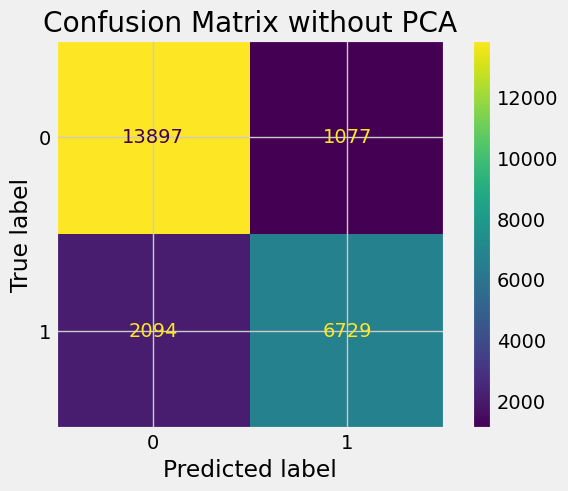

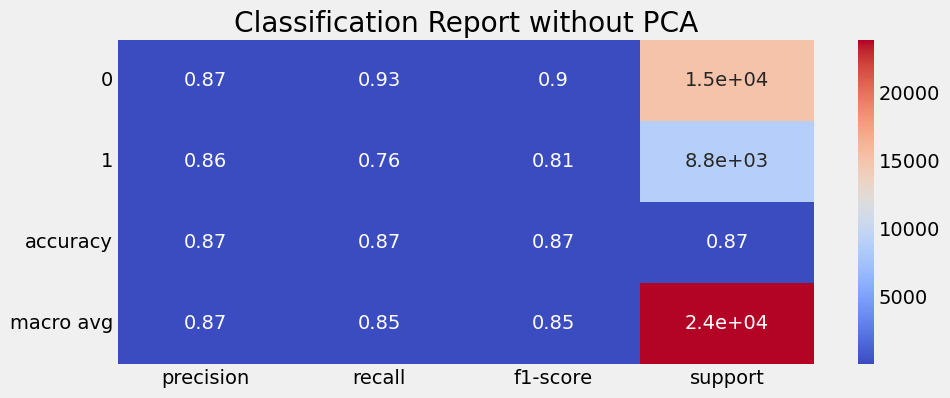

In [46]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# Making predictions
y_pred_rd_clf = rd_clf.predict(X_test)

# Evaluating the model
acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print()
print()

# Confusion Matrix
conf = confusion_matrix(y_test, y_pred_rd_clf)
# Plotting using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix without PCA')
plt.show()
print()
print()

# Classification Report
clf_report = classification_report(y_test, y_pred_rd_clf, output_dict=True)
# Convert classification report to a DataFrame
clf_report_df = pd.DataFrame(clf_report).transpose()
# Round the values to make them easier to read in the heatmap
clf_report_df = clf_report_df.round(2)
# Create a heatmap from the classification report
plt.figure(figsize=(10, 4))
sns.heatmap(clf_report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm')
plt.title('Classification Report without PCA')
plt.show()


##PCA Analysis

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 23)
pca_fit = pca.fit_transform(X)

In [48]:
# splitting data into training set and test set
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(pca_fit, y, test_size = 0.30)

##Decision Tree Classifier with PCA

Accuracy Score of Decision Tree is : 0.8067010309278351




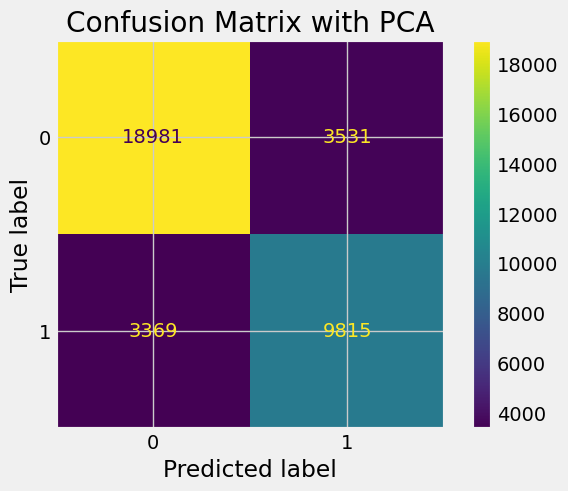

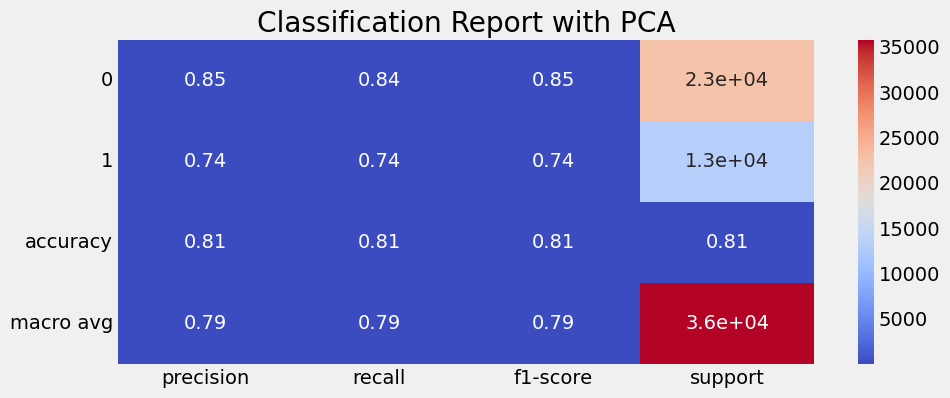

In [49]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_PCA, y_train_PCA)

y_pred_dtc = dtc.predict(X_test_PCA)

# Evaluating the model
# accuracy
acc_dtc = accuracy_score(y_test_PCA, y_pred_dtc)
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print()
print()

# Confusion Matrix
conf = confusion_matrix(y_test_PCA, y_pred_dtc)
# Plotting using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix with PCA')
plt.show()
print()
print()

# Classification Report
clf_report = classification_report(y_test_PCA, y_pred_dtc, output_dict=True)
# Convert classification report to a DataFrame
clf_report_df = pd.DataFrame(clf_report).transpose()
# Round the values to make them easier to read in the heatmap
clf_report_df = clf_report_df.round(2)
# Create a heatmap from the classification report
plt.figure(figsize=(10, 4))
sns.heatmap(clf_report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm')
plt.title('Classification Report with PCA')
plt.show()

##Random Forest Classifier with PCA

Accuracy Score of Random Forest is : 0.8585835948005379




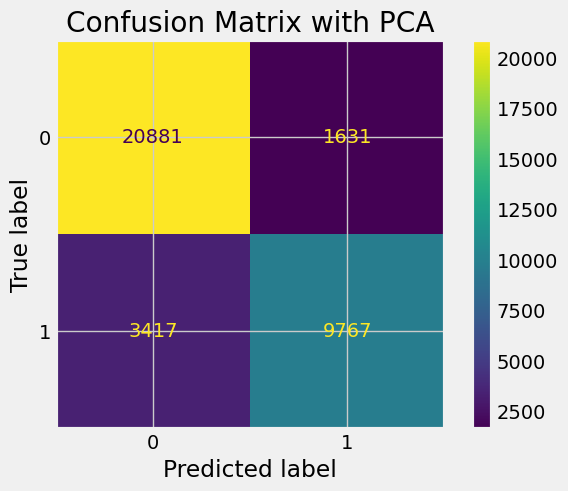

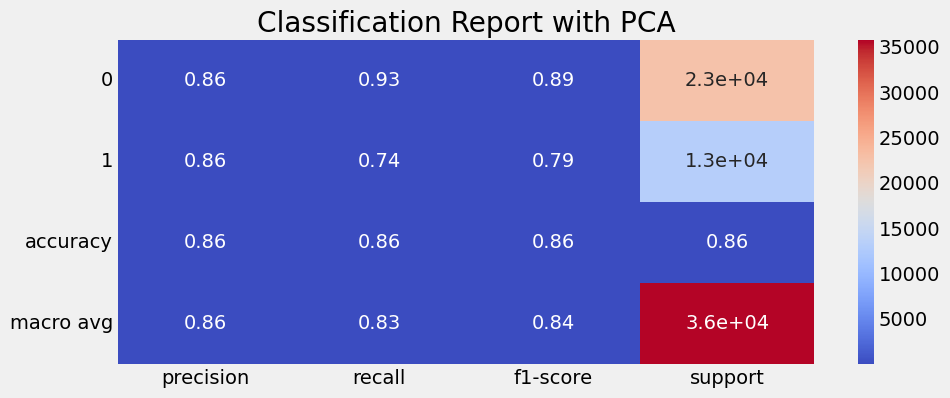

In [50]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train_PCA, y_train_PCA)

y_pred_rd_clf = rd_clf.predict(X_test_PCA)

# Evaluating the model
acc_rd_clf = accuracy_score(y_test_PCA, y_pred_rd_clf)
print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print()
print()

# Confusion Matrix
conf = confusion_matrix(y_test_PCA, y_pred_rd_clf)
# Plotting using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix with PCA')
plt.show()
print()
print()

# Classification Report
clf_report = classification_report(y_test_PCA, y_pred_rd_clf, output_dict=True)
# Convert classification report to a DataFrame
clf_report_df = pd.DataFrame(clf_report).transpose()
# Round the values to make them easier to read in the heatmap
clf_report_df = clf_report_df.round(2)
# Create a heatmap from the classification report
plt.figure(figsize=(10, 4))
sns.heatmap(clf_report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm')
plt.title('Classification Report with PCA')
plt.show()